# Most Fuel Efficient Automobiles


### Introduction

For the past decade now, scientists have provided warnings of the increased risk of global warming, a direct cause of our usage of fossil fuels and our CO2 emissions. However, technology is developing just as fast with the times with most machines being far more efficient and faster than their previous versions. And with gas prices at an all-time high, what better than to analyze the fuel efficiency of current automobiles? This analysis will cover the best fuel-efficient models currently available on the market along with the most consistent manufacturers in this department. The data used will contain all types of automobiles from supercars to pickup trucks and everything in between. By the end of this analysis, I will have determined the most fuel-efficient vehicles and manufacturers from the current models.

![Car](https://cdntdreditorials2.azureedge.net/cache/c/0/2/4/d/8/c024d8062cc02a8a8a32dfb3736ae4edae646456.jpg)

### Data Collection
The data in this analysis has been retrieved from Kaggle, about the 2022 fuel consumption of vehicles. Here is the link to the [dataset](https://www.kaggle.com/datasets/rinichristy/2022-fuel-consumption-ratings).

### Data Preparation
First I will import the libraries needed to perform the analysis and then load the csv file which contains the data set.

In [45]:
import pandas as pd
import seaborn as sns

In [46]:
# Loading data
cars = pd.read_csv(r"Fuel_Consumption_Ratings.csv")

### Data Cleaning
To narrow the data set to the specifics I need, I will need to remove multiple columns which have no relevancy to the topic of this report, and I will also rename the columns to make it easier for the reader.

In [47]:
## dropping unnecessary data
cars = cars.drop(['Model Year', 'Transmission', 'CO2 Rating', 'Smog Rating', 'Fuel Consumption (City (L/100 km)', 
                  'Fuel Consumption(Hwy (L/100 km))', 'Fuel Consumption(Comb (mpg))'], axis=1)

## renaming names of current columns and rows for the reader
cars = cars.replace({'Fuel Type': {'Z': 'Premium Gas', 'X': 'Regular Gas', 'D': 'Diesel', 'E': 'E85'}})
cars.columns = ["Make", "Model", "Class", "Engine Size(L)", "Cylinders", "Fuel Type", "Fuel Consumption(L/100km)", 
                "CO2 Emissions(g/km)"]

# Analysis
### Data Grouping
To start the analysis, first I will take a look at all the classes of vehicles in the dataset. From there I will seperate them into 3 different sets; trucks, small family cars, and big family cars. This will provide the reader with more precise information as each class of vehicle is made for different tasks, it would be unfair to compare a pickup truck with a small hatchback and vice versa. 

In [48]:
# getting all classes and how many cars in each one
class_group = cars.groupby(["Class"]).size()
class_group

Class
Compact                     69
Full-size                   64
Mid-size                   117
Minicompact                 48
Minivan                      7
Pickup truck: Small         20
Pickup truck: Standard     113
SUV: Small                 197
SUV: Standard              141
Special purpose vehicle     12
Station wagon: Mid-size      8
Station wagon: Small        19
Subcompact                  80
Two-seater                  51
dtype: int64

In [49]:
# seperating all trucks from dataset
trucks = cars[cars.Class != "SUV: Small"]
trucks = trucks[trucks.Class != "SUV: Standard"]
trucks = trucks[trucks.Class != "Special purpose vehicle"]
trucks = trucks[trucks.Class != "Station wagon: Mid-size"]
trucks = trucks[trucks.Class != "Station wagon: Small"]
trucks = trucks[trucks.Class != "Subcompact"]
trucks = trucks[trucks.Class != "Two-seater"]
trucks = trucks[trucks.Class != "Minivan"]
trucks = trucks[trucks.Class != "Minicompact"]
trucks = trucks[trucks.Class != "Mid-size"]
trucks = trucks[trucks.Class != "Full-size"]
trucks = trucks[trucks.Class != "Compact"]

# seperating all small family cars from dataset
small_family = cars[cars.Class != "SUV: Small"]
small_family = small_family[small_family.Class != "SUV: Standard"]
small_family = small_family[small_family.Class != "Station wagon: Mid-size"]
small_family = small_family[small_family.Class != "Station wagon: Small"]
small_family = small_family[small_family.Class != "Minivan"]
small_family = small_family[small_family.Class != "Special purpose vehicle"]
small_family = small_family[small_family.Class != "Full-size"]
small_family = small_family[small_family.Class != "Pickup truck: Small"]
small_family = small_family[small_family.Class != "Pickup truck: Standard"]

# seperating all big family cars from dataset
big_family = cars[cars.Class != "Pickup truck: Small"]
big_family = big_family[big_family.Class != "Pickup truck: Standard"]
big_family = big_family[big_family.Class != "Subcompact"]
big_family = big_family[big_family.Class != "Two-seater"]
big_family = big_family[big_family.Class != "Compact"]
big_family = big_family[big_family.Class != "Mid-size"]
big_family = big_family[big_family.Class != "Minicompact"]

### Storing Important Values
Now that I have seperated the dataset into 3 different variables, I will get the minimum and maximum which will prove useful at the end of the report to make a conclusion and I also want to narrow each data set down more because any engine with more than 8 cylinders will have bad fuel economy regardless.

In [50]:
# getting minimum
min_truck = trucks["Fuel Consumption(L/100km)"].min()
min_small_family = small_family["Fuel Consumption(L/100km)"].min()
min_big_family = big_family["Fuel Consumption(L/100km)"].min()

# getting maximum
max_truck = trucks["Fuel Consumption(L/100km)"].max()
max_small_family = small_family["Fuel Consumption(L/100km)"].max()
max_big_family = big_family["Fuel Consumption(L/100km)"].max()

# removing all vehicles with engines that have more than or equal to 8 cylinders
trucks = trucks[trucks.Cylinders < 8]
small_family = small_family[small_family.Cylinders < 8]
big_family = big_family[big_family.Cylinders < 8]

### Graphing
Now I will graph each type of data I have broken the data set into, and see their fuel consumption rate with the number of them in each range with histograms.

[Text(0.5, 1.0, 'Trucks')]

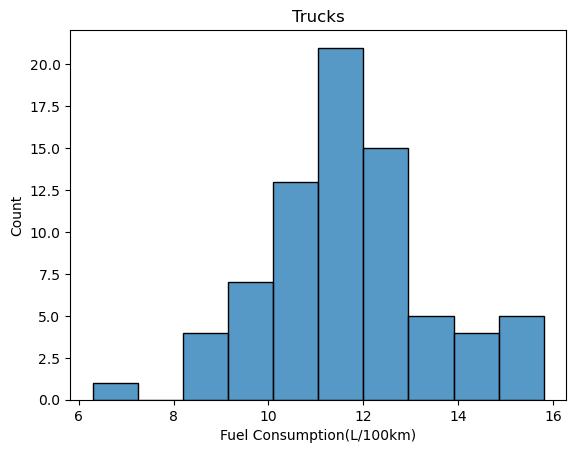

In [51]:
sns.histplot(data=trucks, x="Fuel Consumption(L/100km)", bins=10).set(title='Trucks')

[Text(0.5, 1.0, 'Small Family Cars')]

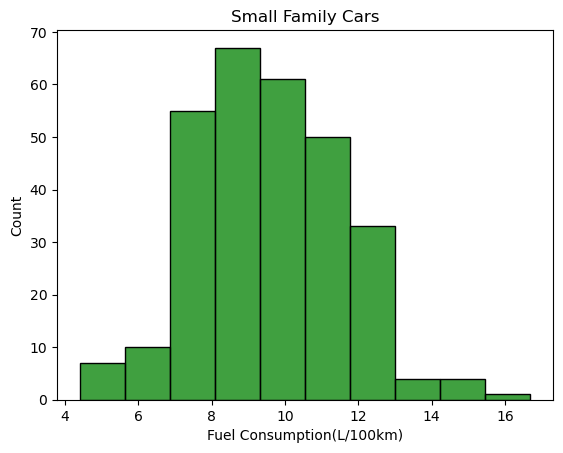

In [52]:
sns.histplot(data=small_family, x="Fuel Consumption(L/100km)", color='green', bins=10).set(title='Small Family Cars')

[Text(0.5, 1.0, 'Big Family Cars')]

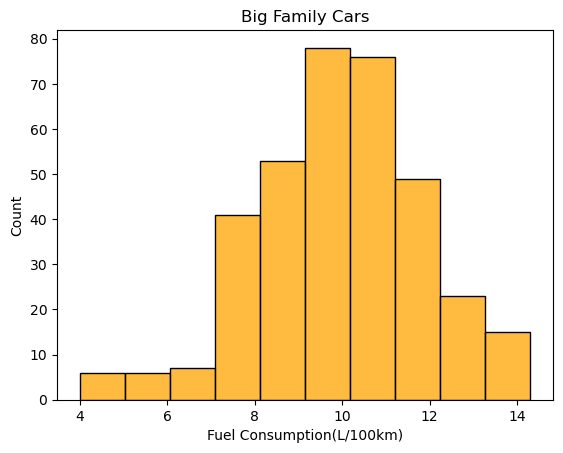

In [53]:
sns.histplot(data=big_family, x="Fuel Consumption(L/100km)", color='orange', bins=10).set(title='Big Family Cars')

### Final Graphs
After analyzing the graphs above, I will make new graphs of the best manufacturers in each category and I will do so by narrowing down the pool of data to what would be considered good fuel economy for each class. So that would be anything less than 11L/100km for trucks and anything less than 7L/100km for the other two sets. Then I will create bar graphs comparing them.

In [54]:
trucks = trucks[trucks["Fuel Consumption(L/100km)"] < 11]
small_family = small_family[small_family["Fuel Consumption(L/100km)"] < 7]
big_family = big_family[big_family["Fuel Consumption(L/100km)"] < 7]

[Text(0.5, 1.0, 'Truck Fuel Economy By Make')]

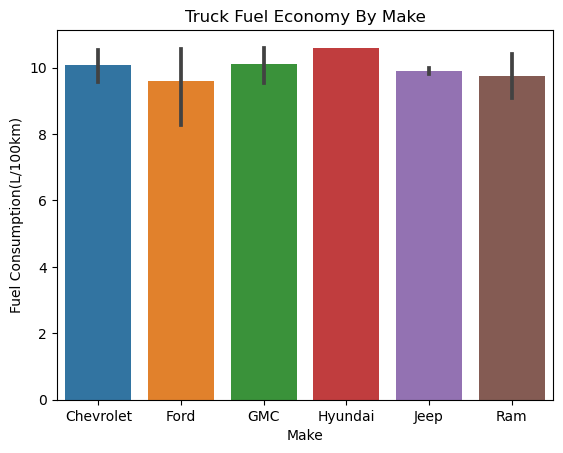

In [55]:
sns.barplot(data=trucks, x="Make", y="Fuel Consumption(L/100km)").set(title="Truck Fuel Economy By Make")

[Text(0.5, 1.0, 'Small Family Car Fuel Economy By Make')]

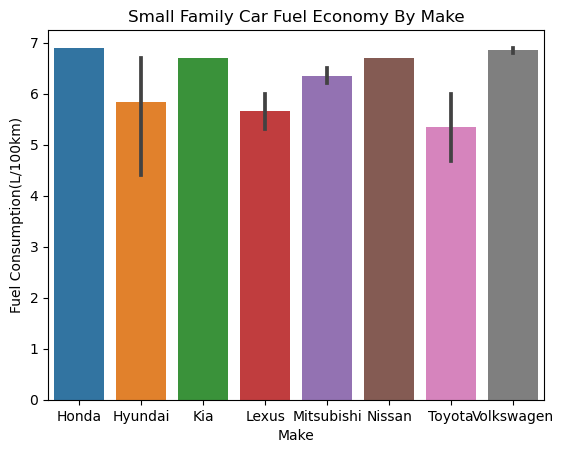

In [56]:
sns.barplot(data=small_family, x="Make", y="Fuel Consumption(L/100km)").set(title="Small Family Car Fuel Economy By Make")

[Text(0.5, 1.0, 'Big Family Car Fuel Economy By Make')]

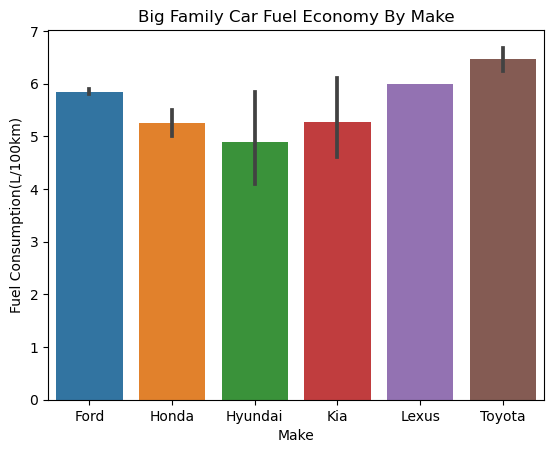

In [57]:
sns.barplot(data=big_family, x="Make", y="Fuel Consumption(L/100km)").set(title="Big Family Car Fuel Economy By Make")

### Final Results
Now I will print the model with the most and least fuel effiecient from each set I created.

In [58]:
trucks[trucks["Fuel Consumption(L/100km)"] == min_truck]

,Make,Model,Class,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption(L/100km),CO2 Emissions(g/km)
339,Ford,Maverick Hybrid,Pickup truck: Small,2.5,4,Regular Gas,6.3,147


In [59]:
cars[(cars["Fuel Consumption(L/100km)"] == max_truck) & (cars["Class"] == "Pickup truck: Standard")]

,Make,Model,Class,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption(L/100km),CO2 Emissions(g/km)
209,Chevrolet,Silverado 4WD Mud Terrain Tire FFV,Pickup truck: Standard,5.3,8,E85,21.5,358
398,GMC,Sierra 4WD Mud Terrain Tire FFV,Pickup truck: Standard,5.3,8,E85,21.5,358


In [60]:
small_family[small_family["Fuel Consumption(L/100km)"] == min_small_family]

,Make,Model,Class,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption(L/100km),CO2 Emissions(g/km)
458,Hyundai,Elantra Hybrid Blue,Mid-size,1.6,4,Regular Gas,4.4,103


In [61]:
cars[cars["Fuel Consumption(L/100km)"] == max_small_family]

,Make,Model,Class,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption(L/100km),CO2 Emissions(g/km)
133,Bugatti,Chiron Pur Sport,Two-seater,8.0,16,Premium Gas,26.1,608
134,Bugatti,Chiron Super Sport,Two-seater,8.0,16,Premium Gas,26.1,608


In [62]:
big_family[big_family["Fuel Consumption(L/100km)"] == min_big_family]

,Make,Model,Class,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption(L/100km),CO2 Emissions(g/km)
460,Hyundai,IONIQ Blue,Full-size,1.6,4,Regular Gas,4.0,94


In [63]:
cars[cars["Fuel Consumption(L/100km)"] == max_big_family]

,Make,Model,Class,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption(L/100km),CO2 Emissions(g/km)
563,Lamborghini,Urus,SUV: Standard,4.0,8,Premium Gas,16.9,384


### Discussion
In this assignment, I took a look at 2022 automobile models, to find which models and makes have the best fuel efficiency. I separated the data into three sets; trucks, small family cars, and big family cars. The analysis proved that the best manufacturer for trucks is Ford, for small family cars it is Toyota, and for the big family cars, it is Hyundai. Along with the most efficient models in each of these sets being the ***Ford Maverick Hybrid*** for trucks, ***Hyundai Elantra Hybrid*** for small family cars, and finally the ***Hyundai IONIQ*** for big family cars. Overall Hyundai seems to make the most fuel-efficient automobiles currently as they are in each of the graphs and two of their models have the best fuel economy in their class.

### References
1. Source [data](https://www.kaggle.com/datasets/rinichristy/2022-fuel-consumption-ratings)
2. [Pandas](https://pandas.pydata.org/) library to manipulate data
3. [Seaborn](https://seaborn.pydata.org/) library to create the graphs to visualize data